# Objective
To automatically categorize/tag TED Talk videos based on a series of features provided in a sample dataset, link below.
Once the text data has been cleaned and prepared, various Classification models will be trained on the sample dataset.

There are two datasets provided: the main summary and the transcripts

**TED Talks: Summary**
https://www.kaggle.com/rounakbanik/ted-talks?select=ted_main.csv

**TED Talks: Transcripts**
https://www.kaggle.com/rounakbanik/ted-talks?select=transcripts.csv

# Problem Statement

The data provided, in its raw format, does not make for easy classification and statistical analysis of the various TED Talks. An automated, and simplified, approach that could quickly classify (tag) a given TED talk, based on other similar feature patterns, would allow for improved viewer experiences from accurate user preference alignment.

### Data Provided - Summary:

- **Comments:** The number of first level comments made on the talk
- **Description:** A blurb of what the talk is about
- **Duration:** The duration of the talk in seconds
- **Event:** The TED/TEDx event where the talk took place
- **Film_date:** The Unix timestamp of the filming
- **Languages:** The number of languages in which the talk is available
- **Main_speaker:** The first named speaker of the talk
- **Name:** The official name of the TED Talk; includes the title and the speaker
- **Num_speaker:** The number of speakers in the talk
- **Published_date:** The Unix timestamp for the publication of the talk on TED.com
- **Ratings:** Groups of ratings assinged to each talk
- **Related_talks:** Similar talks/links
- **Speaker_occupation:** Primary speaker occupation/focus
- **Tags:** Tags assinged to the talk
- **Title:** Title of TED talk
- **Url:** The URL of the talk
- **Views:** Total views for talk

### Data Provided - Transcript:
- **Transcript:** The official English transcript of the talk
- **URL:** The URL of the talk

In [1]:
# Import neccessary libaries

import pandas as pd # Dataframes
import numpy as np # Arrays and Math

# Pandas Profiling Summary report
from pandas_profiling import profile_report

# Visual libraries
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as pe
import matplotlib.pyplot as plt

# set plt inline so plots will automatically run without the .show() command
%matplotlib inline 

# Warnings set to Ignore messages
import warnings
warnings.filterwarnings('ignore')

# Natural Language Processing (NLP)
import string 
import re # RegEX library for specific text isolation

from nltk.tokenize import sent_tokenize, word_tokenize # Tokenize sentences, then words with NLTK
from nltk.corpus import stopwords # Remove stopwords (the, a, is, are, etc.)
from nltk.stem import PorterStemmer # Reduce words back to original base word stem
from nltk import FreqDist # Counts frequency of word distributions

import textstat # Library to count to calculate statistics from text, readability, complexity, etc.

import ast # Abstract Syntax Tree - to help identify and segment information (text) imbedded in lists/dictionaries, etc.

#### Importing Dataset 1: Summary Details

In [2]:
# Import the TED summary dataset as a DataFrame
data1 = pd.read_csv('ted_main.csv')

#### Importing Dataset 2: Transcripts

In [3]:
# Import the TED transcripts dataset as a DataFrame
data2 = pd.read_csv('transcripts.csv')

In [4]:
# Create a copy DataFrame for each dataset, keeping data as backup if needed
TED_summ = data1.copy()

TED_trans = data2.copy()

In [5]:
# Set the dataframe summaries to include all columns - no truncating
pd.set_option('display.max_columns', None)

# View the top 5 rows of data - Summary
TED_summ.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [6]:
# View the top 5 rows of data - Transcripts
TED_trans.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [7]:
# View the bottom 5 rows of data - Summary
TED_summ.tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721


In [8]:
# View the bottom 5 rows of data - Summary
TED_trans.tail()

,transcript,url
2462,"So, Ma was trying to explain something to me a...",https://www.ted.com/talks/duarte_geraldino_wha...
2463,This is a picture of a sunset on Mars taken by...,https://www.ted.com/talks/armando_azua_bustos_...
2464,"In my early days as a graduate student, I went...",https://www.ted.com/talks/radhika_nagpal_what_...
2465,I took a cell phone and accidentally made myse...,https://www.ted.com/talks/theo_e_j_wilson_a_bl...
2466,"We humans are becoming an urban species, so ci...",https://www.ted.com/talks/karoliina_korppoo_ho...


In [9]:
# Inspect the overall shape of the data (rows/columns)
print("DataFrame Shapes:\n")
print("Summary Shape: {}".format(TED_summ.shape))
print("Transcripts Shape: {}".format(TED_trans.shape))

DataFrame Shapes:

Summary Shape: (2550, 17)
Transcripts Shape: (2467, 2)


- The summary file has 2,550 rows of data and 17 columns
- The Transcripts file has slightly less rows (2,467) and only 2 columns

**Both DataFrames have a URL column**, which can likely serve as the same column for merging both datasets into one overall DataFrame.  **83 rows of data will be lost** due to the Transcripts DataFrame having a lower overall row count.

In [10]:
# Use Pandas merge function to combine both datasets on the shared column, URL
TED_combined = pd.merge(TED_summ, TED_trans, how = 'inner', on = 'url') # Use inner to only keep records that match both datasets
print("Combined TED Summary Shape: {}".format(TED_combined.shape))

Combined TED Summary Shape: (2467, 18)


We now have 2,467 combined rows and 18 columns in the combined dataset.

In [11]:
# Examine the combined dataset for missing values and column data types
TED_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 2466
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2467 non-null   int64 
 1   description         2467 non-null   object
 2   duration            2467 non-null   int64 
 3   event               2467 non-null   object
 4   film_date           2467 non-null   int64 
 5   languages           2467 non-null   int64 
 6   main_speaker        2467 non-null   object
 7   name                2467 non-null   object
 8   num_speaker         2467 non-null   int64 
 9   published_date      2467 non-null   int64 
 10  ratings             2467 non-null   object
 11  related_talks       2467 non-null   object
 12  speaker_occupation  2461 non-null   object
 13  tags                2467 non-null   object
 14  title               2467 non-null   object
 15  url                 2467 non-null   object
 16  views               2467

There are **no null values** out of the 2,467 entries, however, **Speaker Occupation appears to be missing 6 values** which could be NAs and will require further analysis.

The variables with Object datatypes can be converted to categorical values, saving space and improving EDA presentation.

### Convert Date Colums to DateTime then Object Data Type to Category

In [12]:
# Update Category datatype, for data columns, to DateTime - initial dataset includes seconds so set unit = 's'
TED_combined['film_date'] = pd.to_datetime(TED_combined['film_date'], unit = 's')
TED_combined['published_date'] = pd.to_datetime(TED_combined['film_date'], unit = 's')

In [13]:
# Update Object datatype to Category
for columns in TED_combined:
    if TED_combined[columns].dtype == 'object':
        TED_combined[columns] = TED_combined[columns].astype('category')

In [14]:
# Reexamine DataFrame ensuring all datatypes previously Object are now Categorical
TED_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 2466
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   comments            2467 non-null   int64         
 1   description         2467 non-null   category      
 2   duration            2467 non-null   int64         
 3   event               2467 non-null   category      
 4   film_date           2467 non-null   datetime64[ns]
 5   languages           2467 non-null   int64         
 6   main_speaker        2467 non-null   category      
 7   name                2467 non-null   category      
 8   num_speaker         2467 non-null   int64         
 9   published_date      2467 non-null   datetime64[ns]
 10  ratings             2467 non-null   category      
 11  related_talks       2467 non-null   category      
 12  speaker_occupation  2461 non-null   category      
 13  tags                2467 non-null   category    

- All columns correctly reflect **Category if previously an Object datatype, excluding Film Date and Published Date** which are set to datetime datatypes.

In [15]:
# Inspect total count of null values in dataset
TED_combined.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
transcript            0
dtype: int64

In [16]:
# Inspect total count of NA (NaN) values in dataset
TED_combined.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
transcript            0
dtype: int64

Due to the fact that there are **only 6 speakers with missing occupations**, all of whom can likely be searched online for generic occupations, these entries can be **manually encoded**.

In [17]:
TED_combined['main_speaker'][TED_combined['speaker_occupation'].isna() == True].values.tolist()

['Sonaar Luthra',
 'Rick Falkvinge',
 'Gary Kovacs',
 'Ryan Holladay',
 'Brian Dettmer',
 'Boniface Mwangi']

In [18]:
# Create a list of speakers with missing occupations
speakers = TED_combined['main_speaker'][TED_combined['speaker_occupation'].isna() == True].values.tolist()

# create an, ordered, input list for respective speaker occupations (from online search)
occupations_input = ['Designer', 'Entrepreneur', 'CEO', 'Inventor', 'Artist', 'Journalist']

# for loop to update each speaker with respective occupation that was missig
for speaker in speakers:
    for occupation in occupations_input:
        TED_combined['speaker_occupation'][TED_combined['main_speaker'] == speaker] = occupation

In [19]:
# Recheck the count of NAs to ensure above loop removed all
TED_combined.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
transcript            0
dtype: int64

There are no missing values in the Speaker Occupation column.

In [20]:
# Inspect total unique counts by column

TED_combined.nunique()

comments               555
description           2464
duration              1059
event                  320
film_date              690
languages               65
main_speaker          2088
name                  2464
num_speaker              5
published_date         690
ratings               2464
related_talks         2464
speaker_occupation    1421
tags                  2447
title                 2464
url                   2464
views                 2464
transcript            2464
dtype: int64

In [21]:
# Inspect Number of Speakers (per talk) column (only column with low unique values count)
TED_combined['num_speaker'].value_counts()

1    2412
2      46
3       5
4       3
5       1
Name: num_speaker, dtype: int64

**Observations**
- 320 unique events listed (e.g. TED2017)
- There 65 unique languages and 555 unique comments tracked indicate **unique counts of languages/comments per event (e.g. 4 different languages and 10 comments for a given TED talk)**
- As expected, the majority of speakers per talk is 1 (2,412), however there were 46 cases of 2 speakers presenting

In [22]:
# Run descriptive statistics summary for all variables - including categorical
TED_combined.describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
comments,2467,NaN,NaN,NaN,NaT,NaT,192.571,284.83,2,63,117,222.5,6404
description,2467,2464,"Shame is an unspoken epidemic, the secret behi...",2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,2467,NaN,NaN,NaN,NaT,NaT,821.76,334.09,135,582,852,1047,3608
event,2467,320,TED2014,84,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
film_date,2467,690,2017-04-24 00:00:00,64,1984-02-02,2017-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
languages,2467,NaN,NaN,NaN,NaT,NaT,28.2914,8.22976,1,23,28,33,72
main_speaker,2467,2088,Hans Rosling,9,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,2467,2464,"Jonathan Haidt: Religion, evolution, and the e...",2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_speaker,2467,NaN,NaN,NaN,NaT,NaT,1.02797,0.208371,1,1,1,1,5
published_date,2467,690,2017-04-24 00:00:00,64,1984-02-02,2017-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Initial Sample Observations**
- **Hans Rosling** was the most frequent speaker (9 presentations)
- The most common speaker occupation is Writer (45 occurrences)
- Thbe most frequent date for filming, and subsequently publishing, was **4/24/2017 (64 occurrences)**
- The most frequest event (year) is **TED2014 (84 occurrences)**

### Top 5 Events, Speakers, and Occupations

In [23]:
# Inspect the top 5 speaker occupations
TED_combined['event'].value_counts().head(5)

TED2014    84
TED2009    81
TED2013    77
TED2016    75
TED2015    75
Name: event, dtype: int64

In [24]:
# Inspect the top 5 main speakers
TED_combined['main_speaker'].value_counts().head(5)

Hans Rosling      9
Juan Enriquez     7
Marco Tempest     6
Rives             6
Jonathan Haidt    5
Name: main_speaker, dtype: int64

In [25]:
# Inspect the top 5 speaker occupations
TED_combined['speaker_occupation'].value_counts().head(5)

Writer          45
Journalist      38
Artist          34
Designer        34
Entrepreneur    30
Name: speaker_occupation, dtype: int64

### Top 10 Talks of All Time

In [26]:
# Summary of top 10 viewed TED talks
TED_combined[['main_speaker', 'title', 'views']].sort_values('views', ascending = False).head(10)

,main_speaker,title,views
0,Ken Robinson,Do schools kill creativity?,47227110
1268,Amy Cuddy,Your body language may shape who you are,43155405
649,Simon Sinek,How great leaders inspire action,34309432
800,Brené Brown,The power of vulnerability,31168150
444,Mary Roach,10 things you didn't know about orgasm,22270883
1695,Julian Treasure,How to speak so that people want to listen,21594632
198,Jill Bolte Taylor,My stroke of insight,21190883
5,Tony Robbins,Why we do what we do,20685401
2033,James Veitch,This is what happens when you reply to spam email,20475972
1338,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",19787465


### Reducing Dataset - Remove Unneccessary Rows/Columns
- Since almost 98% of the Talks involved only 1 speaker, all talks with a higher count can be removed
- The following columns **don't benefit the purposes of this project as it relates to Natural Language Processing:**
    - Related Talks
    - URL
    - Languages
    - Number of Speakers    
    - Views - although helpful in identifying top videos above), offers no NLP analysis value
    - Speaker Name (redundant - already in Main Speaker column)

In [27]:
# Drop the above listed columns from the combined DataFrame
TED_combined.drop(columns = ['related_talks', 'languages', 'url','name','views', 'num_speaker'], axis = 1, inplace = True)

In [28]:
# Inspect updated DataFrame shape
TED_combined.shape

(2467, 12)

After removing the 6 columns mentioned above, the DataFrame now consists of **2.467 rows and 12 columns**.

In [29]:
# Create empty count lists and loop through appending textstat counts accordingly
sentence_cnt = []
character_cnt = []
word_cnt = []

for i in TED_combined['transcript']:
    
    sentence_cnt.append(textstat.sentence_count(i))
    character_cnt.append(textstat.char_count(i, ignore_spaces = True))
    word_cnt.append(len(i.split()))

In [30]:
# Add counts to main DataFrame
TED_combined['sentence_cnt'] = sentence_cnt
TED_combined['character_cnt'] = character_cnt
TED_combined['word_cnt'] = word_cnt

In [31]:
# Examine the top 5 rows to confirm the 3 new columns above correctly mapped
TED_combined.head()

,comments,description,duration,event,film_date,main_speaker,published_date,ratings,speaker_occupation,tags,title,transcript,sentence_cnt,character_cnt,word_cnt
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,Ken Robinson,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,Good morning. How are you?(Laughter)It's been ...,191,14344,3066
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,Al Gore,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",108,9726,2089
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,David Pogue,2006-02-24,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,"(Music: ""The Sound of Silence,"" Simon & Garfun...",223,15057,3253
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,Majora Carter,2006-02-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,If you're here today — and I'm very happy that...,152,15235,3015
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,Hans Rosling,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,"About 10 years ago, I took on the task to teac...",209,14245,3121


In [32]:
# Convert Ratings column to individual dictionary lists of strings, by row
TED_combined['ratings'] = [ast.literal_eval(x) for x in TED_combined['ratings']]

In [33]:
# Convert tags column to individual lists of strings, by row
TED_combined['tags'] = [ast.literal_eval(x) for x in TED_combined['tags']]

In [34]:
# USE AST library to retrievbe list inside the string dtype list (ratings)
# TED_combined['ratings'] = TED_combined['ratings'].apply(lambda x: ast.literal_eval(str(x)))

In [35]:
# USE AST library to retrievbe list inside the string dtype list (ratings)
# TED_combined["tags"] = TED_combined["tags"].apply(lambda x: ast.literal_eval(str(x)))

In [36]:
# Examine the list of all Ratings assigned to the first TED talk on the 1st row
TED_combined['ratings'][0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [37]:
# Examine the list of all Tags assigned to the first TED talk on the 1st row
TED_combined['tags'][0]

['children',
 'creativity',
 'culture',
 'dance',
 'education',
 'parenting',
 'teaching']

The Ratings column now reflects a **list of dictionary entries for each rating and respective count assigned** - e.g. Funny at 19,645 for the 1st row.

In [38]:
# Function to extract total number from ratings column (list)
def get_total(x):
    """
    Function counts and aggregates the embedded rating counts (inside a list of dictionaries) to derive the total for each row
    (TED talk).
    
    x: input column - Ratings column to iterate through

    """
    count = 0
    for i in x:
        # i = dictionary counts
        count += i['count'] # Increase by each row's dictionary 'count' key, summing up the totals
    return count

In [39]:
# Apply the above function to create a total of all Ted Ratings, by row/talk
TED_combined['total_ratings'] = TED_combined['ratings'].apply(lambda x: get_total(x))

In [40]:
TED_combined['total_ratings']

0       93850
1        2936
2        2824
3        3728
4       25620
        ...  
2462      192
2463      151
2464      136
2465      583
2466      142
Name: total_ratings, Length: 2467, dtype: int64

In [41]:
# Sort the dataset by highest count of reviews
TED_combined.sort_values(by = 'total_ratings', ascending = False).head()

,comments,description,duration,event,film_date,main_speaker,published_date,ratings,speaker_occupation,tags,title,transcript,sentence_cnt,character_cnt,word_cnt,total_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,Ken Robinson,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,Good morning. How are you?(Laughter)It's been ...,191,14344,3066,93850
198,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,2008-02-27,Jill Bolte Taylor,2008-02-27,"[{'id': 22, 'name': 'Fascinating', 'count': 14...",Neuroanatomist,"[biology, brain, consciousness, global issues,...",My stroke of insight,I grew up to study the brain because I have a ...,140,11896,2660,70665
1268,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,2012-06-26,Amy Cuddy,2012-06-26,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...",Social psychologist,"[body language, brain, business, psychology, s...",Your body language may shape who you are,So I want to start by offering you a free no-t...,227,16409,3602,65968
800,1927,Brené Brown studies human connection -- our ab...,1219,TEDxHouston,2010-06-06,Brené Brown,2010-06-06,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...",Vulnerability researcher,"[TEDx, communication, culture, depression, fea...",The power of vulnerability,"So, I'll start with this: a couple years ago, ...",170,13781,3046,60078
649,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound,2009-09-17,Simon Sinek,2009-09-17,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...",Leadership expert,"[TEDx, business, entrepreneur, leadership, suc...",How great leaders inspire action,How do you explain when things don't go as we ...,187,13758,2986,56779


In [42]:
TED_combined['total_ratings'].describe()

count     2467.000000
mean      2451.769761
std       4230.185265
min         68.000000
25%        881.500000
50%       1463.000000
75%       2521.000000
max      93850.000000
Name: total_ratings, dtype: float64

In [43]:
# Identify the Video and Speaker with the lowest total rating counts
TED_combined[['title', 'main_speaker','total_ratings']][TED_combined['total_ratings'] == TED_combined['total_ratings'].min()]

,title,main_speaker,total_ratings
2445,How your pictures can help reclaim lost history,Chance Coughenour,68


In [44]:
# Identify the Video and Speaker with the highest total rating counts
TED_combined[['title', 'main_speaker','total_ratings']][TED_combined['total_ratings'] == TED_combined['total_ratings'].max()]

,title,main_speaker,total_ratings
0,Do schools kill creativity?,Ken Robinson,93850


#### Observations
- The most rated TED talk of all time is **Do schools kill creativity? by Ken Robinson (93,850 total reviews)**
- The least rated TED talk of all time is **How your pictures can help reclaimn lost history by Chance Coughenour (68 total reviews)**

### Isolate Unique Ratings (Inside Row List/Dictionary)

In [45]:
# Create an empty list to append all ratings from the combined dictionary, looping through each iteration in prior lists
ratings = []
for h in range(0,len(TED_combined)):
    for i in TED_combined['ratings'][h]:
        ratings.append(i['name'])

In [46]:
# Confirm that the first 28 records (first 2 rows) in the ratings list against the first two rows in the DataFrame for ratings
ratings[0:28]

['Funny',
 'Beautiful',
 'Ingenious',
 'Courageous',
 'Longwinded',
 'Confusing',
 'Informative',
 'Fascinating',
 'Unconvincing',
 'Persuasive',
 'Jaw-dropping',
 'OK',
 'Obnoxious',
 'Inspiring',
 'Funny',
 'Courageous',
 'Confusing',
 'Beautiful',
 'Unconvincing',
 'Longwinded',
 'Informative',
 'Inspiring',
 'Fascinating',
 'Ingenious',
 'Persuasive',
 'Jaw-dropping',
 'Obnoxious',
 'OK']

In [47]:
# The list below for the Name keys should match the list above, for each of the 28 records (first 2 rows)
TED_combined['ratings'][0] + TED_combined['ratings'][1]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924},
 {'id': 7, 'name': 'Funny', 'count': 544},
 {'id': 3, 'name': 'Courageous', 'count': 139},
 {'id': 2, 'name': 'Confusing', 'count': 62},
 {'id': 1, 'name': 'Beautiful', 'count': 58},
 {'id': 21, 'name': 'Unconvincing', 'count': 258},
 {'id': 11, 'name': 'Longwinded', 'count': 113},
 {'id': 8, 'name': 'Informative', '

In [48]:
# Create a list of only unique ratings within the entire ratings list 
unq_ratings = [i for n, i in enumerate(ratings) if i not in ratings[:n]]

# Convert all items in the list to lower case, to match the rest of the DataFrame that they'll be added to
for rating in range(len(unq_ratings)):
    unq_ratings[rating] = unq_ratings[rating].lower()
    
# Examine the list
unq_ratings

['funny',
 'beautiful',
 'ingenious',
 'courageous',
 'longwinded',
 'confusing',
 'informative',
 'fascinating',
 'unconvincing',
 'persuasive',
 'jaw-dropping',
 'ok',
 'obnoxious',
 'inspiring']

In [49]:
print("Length of Unique Ratings List: {}".format(len(unq_ratings)))

Length of Unique Ratings List: 14


### Isolate Unique Tags (Inside Row List)

In [379]:
# Create an empty list to append all ratings from the combined dictionary, looping through each iteration in prior lists
tags = []
for h in range(0,len(TED_combined)):
    for i in TED_combined['tags'][h]:
        tags.append(i)

In [380]:
# Create a list of only unique tags within the entire tags list 
unq_tags = [i for n, i in enumerate(tags) if i not in tags[:n]]

# Convert all items in the list to lower case, to match the rest of the DataFrame that they'll be added to
for tag in range(len(unq_tags)):
    unq_tags[tag] = unq_tags[tag].lower()
    
# Examine the list
unq_tags

['children',
 'creativity',
 'culture',
 'dance',
 'education',
 'parenting',
 'teaching',
 'alternative energy',
 'cars',
 'climate change',
 'environment',
 'global issues',
 'science',
 'sustainability',
 'technology',
 'computers',
 'entertainment',
 'interface design',
 'media',
 'music',
 'performance',
 'simplicity',
 'software',
 'macarthur grant',
 'activism',
 'business',
 'cities',
 'green',
 'inequality',
 'politics',
 'pollution',
 'africa',
 'asia',
 'google',
 'demo',
 'economics',
 'global development',
 'health',
 'math',
 'statistics',
 'visualizations',
 'goal-setting',
 'motivation',
 'potential',
 'psychology',
 'christianity',
 'god',
 'atheism',
 'comedy',
 'humor',
 'religion',
 'storytelling',
 'architecture',
 'collaboration',
 'design',
 'library',
 'ted brain trust',
 'brain',
 'cognitive science',
 'consciousness',
 'evolution',
 'philosophy',
 'happiness',
 'leadership',
 'philanthropy',
 'disaster relief',
 'invention',
 'open-source',
 'ted prize',
 'art

In [390]:
# Create a DataFrame (Series) - for easier EDA analysis of Tags
unq_tags = pd.DataFrame(unq_tags)

# Rename the first column and examine the DataFrame
unq_tags.rename(columns = {unq_tags.columns[0]: 'unique tags'}, inplace = True)
unq_tags

,unique tags
0,children
1,creativity
2,culture
3,dance
4,education
...,...
411,ted residency
412,biosphere
413,ted-ed
414,epidemiology


In [381]:
print("Length of Unique Tags List: {}".format(len(unq_tags)))

Length of Unique Tags List: 416


### Create Columns for Each Rating Count

In [50]:
# As shown above, there are 14 rating categories in a consistent order - we can apply lambda functions for each unique rating

TED_combined['funny'] = TED_combined['ratings'].apply(lambda x: x[0]['count'])
TED_combined['beautiful'] = TED_combined['ratings'].apply(lambda x: x[1]['count'])
TED_combined['ingenious'] = TED_combined['ratings'].apply(lambda x: x[2]['count'])
TED_combined['courageous'] = TED_combined['ratings'].apply(lambda x: x[3]['count'])
TED_combined['longwinded'] = TED_combined['ratings'].apply(lambda x: x[4]['count'])
TED_combined['confusing'] = TED_combined['ratings'].apply(lambda x: x[5]['count'])
TED_combined['informative'] = TED_combined['ratings'].apply(lambda x: x[6]['count'])
TED_combined['fascinating'] = TED_combined['ratings'].apply(lambda x: x[7]['count'])
TED_combined['unconvincing'] = TED_combined['ratings'].apply(lambda x: x[8]['count'])
TED_combined['persuasive'] = TED_combined['ratings'].apply(lambda x: x[9]['count'])
TED_combined['jaw-dropping'] = TED_combined['ratings'].apply(lambda x: x[10]['count'])
TED_combined['ok'] = TED_combined['ratings'].apply(lambda x: x[11]['count'])
TED_combined['obnoxious'] = TED_combined['ratings'].apply(lambda x: x[12]['count'])
TED_combined['inspiring'] = TED_combined['ratings'].apply(lambda x: x[13]['count'])

In [51]:
# Examine the top 5 rows of data to ensure all new ratings columns and respective counts have been added
TED_combined.head()

,comments,description,duration,event,film_date,main_speaker,published_date,ratings,speaker_occupation,tags,title,transcript,sentence_cnt,character_cnt,word_cnt,total_ratings,funny,beautiful,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,Ken Robinson,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,Good morning. How are you?(Laughter)It's been ...,191,14344,3066,93850,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,Al Gore,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",108,9726,2089,2936,544,139,62,58,258,113,443,413,132,56,268,116,131,203
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,David Pogue,2006-02-24,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"[computers, entertainment, interface design, m...",Simplicity sells,"(Music: ""The Sound of Silence,"" Simon & Garfun...",223,15057,3253,2824,964,45,183,60,104,78,395,230,166,27,146,230,54,142
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,Majora Carter,2006-02-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Activist for environmental justice,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,If you're here today — and I'm very happy that...,152,15235,3015,3728,760,291,32,59,105,36,53,380,1070,132,460,230,35,85
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,Hans Rosling,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Global health expert; data visionary,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,"About 10 years ago, I took on the task to teac...",209,14245,3121,25620,3202,1390,942,318,110,72,67,5433,2893,4606,3736,2542,248,61


### Convert Ratings Columns to % of Total Count

In [52]:
# Convert each of the ratings columns to a % of the overall count
for rating in unq_ratings:
    TED_combined[rating] = round((TED_combined[rating] / TED_combined['total_ratings']),4)

In [53]:
# Reexamine the ratings columns to make sure that all were converted to decimals (4) representing % of total count
TED_combined.head()

,comments,description,duration,event,film_date,main_speaker,published_date,ratings,speaker_occupation,tags,title,transcript,sentence_cnt,character_cnt,word_cnt,total_ratings,funny,beautiful,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,Ken Robinson,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,Good morning. How are you?(Laughter)It's been ...,191,14344,3066,93850,0.2093,0.0487,0.0647,0.0347,0.0041,0.0026,0.0783,0.1127,0.0032,0.1141,0.0473,0.0125,0.0022,0.2656
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,Al Gore,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",108,9726,2089,2936,0.1853,0.0473,0.0211,0.0198,0.0879,0.0385,0.1509,0.1407,0.0450,0.0191,0.0913,0.0395,0.0446,0.0691
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,David Pogue,2006-02-24,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"[computers, entertainment, interface design, m...",Simplicity sells,"(Music: ""The Sound of Silence,"" Simon & Garfun...",223,15057,3253,2824,0.3414,0.0159,0.0648,0.0212,0.0368,0.0276,0.1399,0.0814,0.0588,0.0096,0.0517,0.0814,0.0191,0.0503
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,Majora Carter,2006-02-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Activist for environmental justice,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,If you're here today — and I'm very happy that...,152,15235,3015,3728,0.2039,0.0781,0.0086,0.0158,0.0282,0.0097,0.0142,0.1019,0.2870,0.0354,0.1234,0.0617,0.0094,0.0228
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,Hans Rosling,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Global health expert; data visionary,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,"About 10 years ago, I took on the task to teac...",209,14245,3121,25620,0.1250,0.0543,0.0368,0.0124,0.0043,0.0028,0.0026,0.2121,0.1129,0.1798,0.1458,0.0992,0.0097,0.0024


In [54]:
# Print column summary for adding together all % columns to create total column and sum to to 100%
for i in TED_combined.columns:
    print(TED_combined.columns.get_loc(i), i)

0 comments
1 description
2 duration
3 event
4 film_date
5 main_speaker
6 published_date
7 ratings
8 speaker_occupation
9 tags
10 title
11 transcript
12 sentence_cnt
13 character_cnt
14 word_cnt
15 total_ratings
16 funny
17 beautiful
18 ingenious
19 courageous
20 longwinded
21 confusing
22 informative
23 fascinating
24 unconvincing
25 persuasive
26 jaw-dropping
27 ok
28 obnoxious
29 inspiring


Columns: 16 through 29 should be summed up and new column **total ratings (%)** created.

In [55]:
# Create new Total Ratings (%) column based on aggregating each rating column % split of total
TED_combined['total ratings (%)'] = round(TED_combined.iloc[:,16:30].sum(axis = 1),1)

In [56]:
TED_combined.head(1)

,comments,description,duration,event,film_date,main_speaker,published_date,ratings,speaker_occupation,tags,title,transcript,sentence_cnt,character_cnt,word_cnt,total_ratings,funny,beautiful,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring,total ratings (%)
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,Ken Robinson,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,Good morning. How are you?(Laughter)It's been ...,191,14344,3066,93850,0.2093,0.0487,0.0647,0.0347,0.0041,0.0026,0.0783,0.1127,0.0032,0.1141,0.0473,0.0125,0.0022,0.2656,1.0


### Move Total Ratings column to end of DataFrame

In [57]:
# To move the column to the end, first create a copy column/series and delete the original column from the DataFrame
last_column = TED_combined.pop('total_ratings')

# Then insert the copied column at position 30 (+1 to the 29th column previously last)
TED_combined.insert(30, 'total_ratings', last_column)

In [58]:
# Examine the top row of data, ensuring that the total ratings % is 1.0 and the total ratings equals 93,850 seen previously
TED_combined.head(1)

,comments,description,duration,event,film_date,main_speaker,published_date,ratings,speaker_occupation,tags,title,transcript,sentence_cnt,character_cnt,word_cnt,funny,beautiful,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring,total ratings (%),total_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,Ken Robinson,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,Good morning. How are you?(Laughter)It's been ...,191,14344,3066,0.2093,0.0487,0.0647,0.0347,0.0041,0.0026,0.0783,0.1127,0.0032,0.1141,0.0473,0.0125,0.0022,0.2656,1.0,93850


### Create Primary Rating Column - Based on Max Rating Value per Row
One identified as the primary rating category, this column will **serve as the Target column for Classification model training**.

In [59]:
# Create a new summary column that pulls whichever rating column name has the maximum % split proportionately
TED_combined['primary_rating'] = TED_combined[['funny', 'beautiful', 'ingenious', 'courageous', 'longwinded', 'confusing', 'informative', 'fascinating',
 'unconvincing', 'persuasive', 'jaw-dropping', 'ok', 'obnoxious', 'inspiring']].idxmax(axis=1)

In [60]:
# Inspect the top 5 rows to ensure primary rating column working as expected (rating choosen should have max value per row)
TED_combined.head()

,comments,description,duration,event,film_date,main_speaker,published_date,ratings,speaker_occupation,tags,title,transcript,sentence_cnt,character_cnt,word_cnt,funny,beautiful,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring,total ratings (%),total_ratings,primary_rating
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,Ken Robinson,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,Good morning. How are you?(Laughter)It's been ...,191,14344,3066,0.2093,0.0487,0.0647,0.0347,0.0041,0.0026,0.0783,0.1127,0.0032,0.1141,0.0473,0.0125,0.0022,0.2656,1.0,93850,inspiring
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,Al Gore,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",108,9726,2089,0.1853,0.0473,0.0211,0.0198,0.0879,0.0385,0.1509,0.1407,0.0450,0.0191,0.0913,0.0395,0.0446,0.0691,1.0,2936,funny
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,David Pogue,2006-02-24,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"[computers, entertainment, interface design, m...",Simplicity sells,"(Music: ""The Sound of Silence,"" Simon & Garfun...",223,15057,3253,0.3414,0.0159,0.0648,0.0212,0.0368,0.0276,0.1399,0.0814,0.0588,0.0096,0.0517,0.0814,0.0191,0.0503,1.0,2824,funny
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,Majora Carter,2006-02-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Activist for environmental justice,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,If you're here today — and I'm very happy that...,152,15235,3015,0.2039,0.0781,0.0086,0.0158,0.0282,0.0097,0.0142,0.1019,0.2870,0.0354,0.1234,0.0617,0.0094,0.0228,1.0,3728,unconvincing
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,Hans Rosling,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",Global health expert; data visionary,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,"About 10 years ago, I took on the task to teac...",209,14245,3121,0.1250,0.0543,0.0368,0.0124,0.0043,0.0028,0.0026,0.2121,0.1129,0.1798,0.1458,0.0992,0.0097,0.0024,1.0,25620,fascinating


In [136]:
# Inspect the total count by unique rating category
TED_combined['primary_rating'].value_counts()

funny           733
beautiful       608
ingenious       429
courageous      258
longwinded      173
confusing       107
informative      61
fascinating      30
jaw-dropping     27
unconvincing     25
persuasive       10
inspiring         4
obnoxious         1
ok                1
Name: primary_rating, dtype: int64

The majority of talks have an overall primary rating of **Funny (733) or Beautiful (608)**.

### Summary Details by Top Rating %

In [397]:
# Create a new DataFrame that identifies the Event, Speaker, and Title that scored the highest rating in each category
top_ratings = pd.DataFrame(columns = ['top_rating'], data = TED_combined[['event', 'funny', 'beautiful', 'ingenious', 'courageous', 'longwinded', 'confusing', 'informative', 'fascinating',
 'unconvincing', 'persuasive', 'jaw-dropping', 'ok', 'obnoxious', 'inspiring']].max())

# Reset the index column and raname
top_ratings = top_ratings.reset_index()
top_ratings.rename(columns = {top_ratings.columns[0]: 'rating_category'}, inplace = True)

# Sort in descending order or ratings
top_ratings.sort_values(['top_rating'], ascending = False)

,rating_category,top_rating
2,ingenious,0.8332
10,jaw-dropping,0.7100
0,funny,0.7021
1,beautiful,0.6699
9,persuasive,0.6428
4,longwinded,0.4809
7,fascinating,0.4542
12,obnoxious,0.4504
8,unconvincing,0.4268
3,courageous,0.4244


#### Top 5 Rated TED Talks - Positive Ratings

In [398]:
# Locate and print a summary of the top 5 TED talks by positive rating - title, speaker, event

print('Most {}:'.format(top_ratings['rating_category'][0]))
print(TED_combined[['title', 'main_speaker', 'event']][TED_combined['funny'] == 0.7021])
print('')

print('Most {}:'.format(top_ratings['rating_category'][1]))
print(TED_combined[['title', 'main_speaker', 'event']][TED_combined['beautiful'] == 0.6699])
print('')

print('Most {}:'.format(top_ratings['rating_category'][2]))
print(TED_combined[['title', 'main_speaker', 'event']][TED_combined['ingenious'] == 0.8332])
print('')

print('Most {}:'.format(top_ratings['rating_category'][3]))
print(TED_combined[['title', 'main_speaker', 'event']][TED_combined['courageous'] == 0.4244])
print('')

print('Most {}:'.format(top_ratings['rating_category'][6]))
print(TED_combined[['title', 'main_speaker', 'event']][TED_combined['informative'] == 0.3945])
print('')

Most funny:
                        title   main_speaker    event
657  It's time for "The Talk"  Julia Sweeney  TED2010

Most beautiful:
                                                  title main_speaker  \
1320  A Saudi, an Indian and an Iranian walk into a ...  Maz Jobrani   

           event  
1320  TEDxSummit  

Most ingenious:
                          title    main_speaker    event
933  Building a park in the sky  Robert Hammond  TED2011

Most courageous:
                     title    main_speaker    event
98  Technology's long tail  Chris Anderson  TED2004

Most informative:
                                                  title    main_speaker  \
1863  How to revive a neighborhood: with imagination...  Theaster Gates   

        event  
1863  TED2015  



#### Top 3 Rated TED Talks - Negative Ratings

In [399]:
# Locate and print a summary of the top 3 TED talks by negative rating - title, speaker, event

print('Most {}:'.format(top_ratings['rating_category'][4]))
print(TED_combined[['title', 'main_speaker', 'event']][TED_combined['longwinded'] == 0.4809])
print('')

print('Most {}:'.format(top_ratings['rating_category'][5]))
print(TED_combined[['title', 'main_speaker', 'event']][TED_combined['confusing'] == 0.4145])
print('')

print('Most {}:'.format(top_ratings['rating_category'][8]))
print(TED_combined[['title', 'main_speaker', 'event']][TED_combined['unconvincing'] == 0.4268])
print('')

Most longwinded:
              title  main_speaker    event
331  Tidying up art  Ursus Wehrli  TED2006

Most confusing:
                      title       main_speaker           event
127  How I built a windmill  William Kamkwamba  TEDGlobal 2007

Most unconvincing:
                            title  main_speaker    event
16  Improvising on piano, aged 14  Jennifer Lin  TED2004



## Exploratory Data Analysis

### Univarite Analysis

In [364]:
# Create a function to apply % splits to all categorical count plots

def plotpercentage(plot, feature):
    """
    Function to add percentage splits for each bar/bin in a given countplot.
    
    plot: Bar/count plot selection
    feature: Specific feature to plot
    
    """
    
    total = len(feature) # Total the variable to calculate the denominator for overall % splits
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Get the height of each bar/bin and divides by total height
        x = p.get_x() + p.get_width() / 5 # Get x location for placement
        y = p.get_y() + p.get_height() + 3 # Get y location for placement
        
        ax.annotate(percentage, (x, y), size = 15) # Place the annotation at the above coordinates

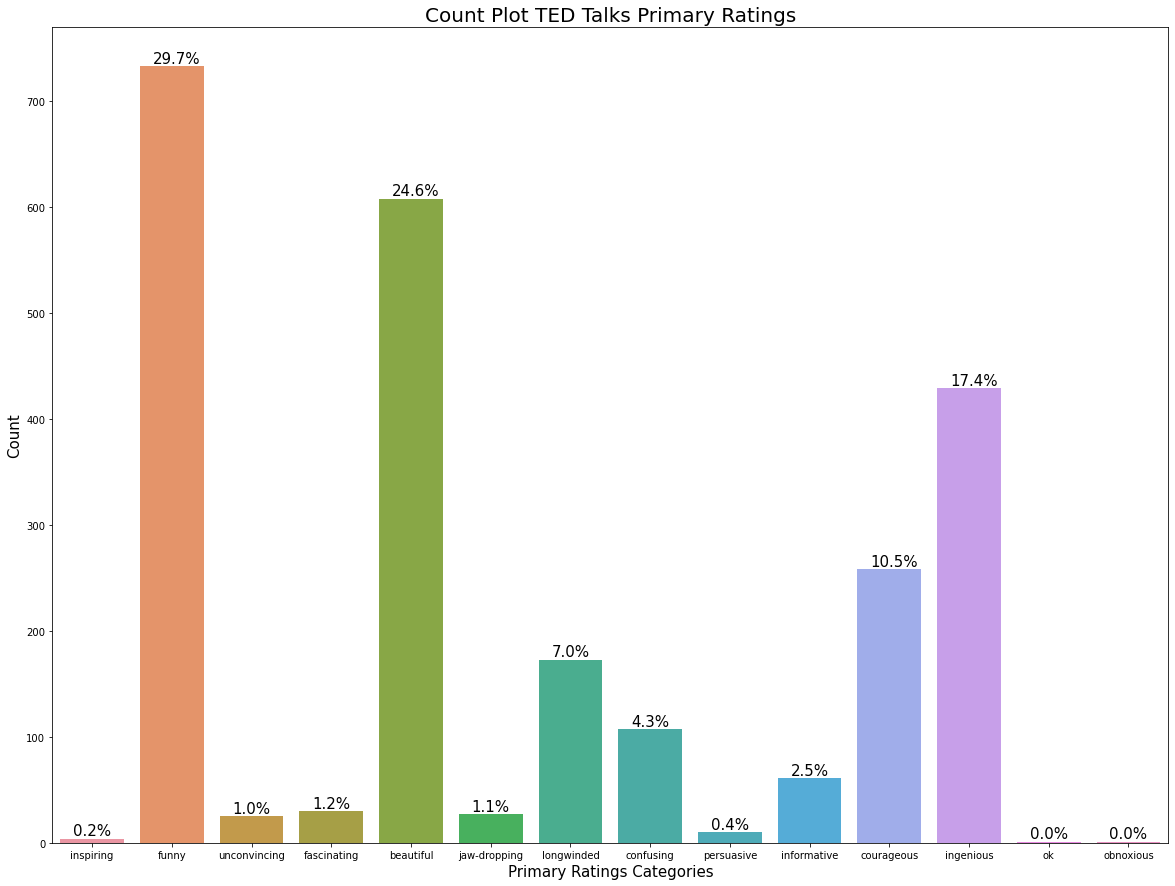

In [375]:
plt.figure(figsize = (20,15))

ax = sns.countplot(x = TED_combined['primary_rating']);
plt.title('Count Plot TED Talks Primary Ratings', fontdict = {'fontsize': 20})
plt.xlabel('Primary Ratings Categories', fontdict = {'fontsize': 15})
plt.ylabel('Count', fontdict = {'fontsize': 15})

plotpercentage(ax, TED_combined['primary_rating'])

### Correlation

In [419]:
# Create correlation matrix for all numerical variables in dataset - remove totral ratings % as it's custom and not correlated
corr = TED_combined.corr()
corr = corr.drop('total ratings (%)')

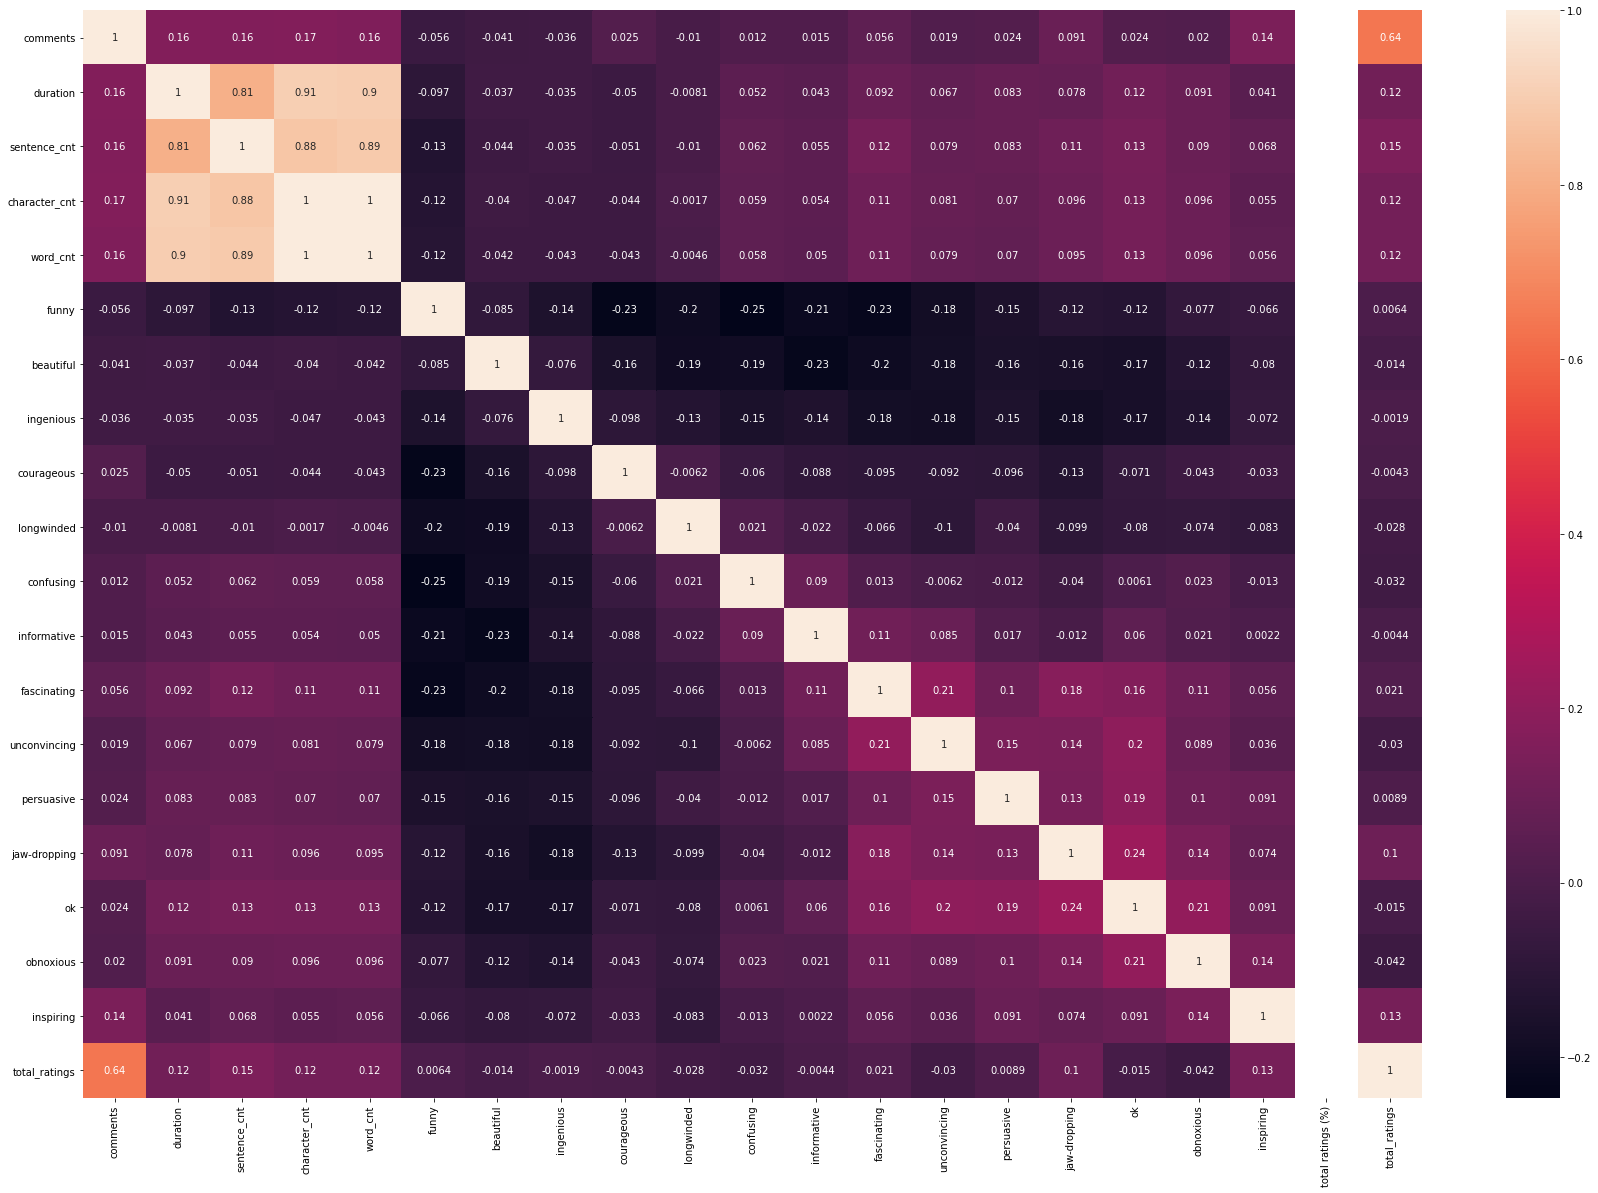

In [425]:
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, cmap = 'rocket');

In [426]:
# plt.figure(figsize = (25,20))
# sns.pairplot(TED_combined, hue = 'primary_rating', corner = True)

In [ ]:
sent = sent_tokenize(TED_combined['transcript'][0])
sent

In [ ]:
# Tokenize Transcripts and Remove Stopwords
stop_words = set(stopwords.words('english'))

result = [i for i in sent if not i in stop_words]
print(result)

In [ ]:
# Tokenize Transcripts and Remove Stopwords

stop_words = set(stopwords.words('english'))
tokens = word_tokenize(TED_combined['transcript'][0])
result = [i for i in tokens if not i in stop_words]
print(result)

In [ ]:
for line in result:
    re.sub(pattern = '\W', repl = '', string = line)
    print(line)

In [ ]:
input_str = 'NLTK is a leading platform for building Python programs to work with human language data.'
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
tokens = word_tokenize(input_str)
result = [i for i in tokens if not i in stop_words]
print (result)

In [ ]:
stemmer= PorterStemmer()
for word in result:
    print(stemmer.stem(word))

In [ ]:
TED_combined['transcript'][0].lower().split()